# Vertical transmission: Sobol sensitivity analysis

In [1]:
from SALib.sample import saltelli, fast_sampler
import pandas as pd
from Sensitivity import Sensitivity
import joblib

model_path = "../models/BMI-SNP/"
output_path = "../output/data/"
plots_path = "../output/plots/"

In [2]:
# parameter dictionary
problem = {
    'num_vars': 3,
    'names': ['random-mating', 'leakage', 'fertility-differential'],
    'bounds': [[0, 1.0],
               [0, 0.50],
               [0, 0.30]]
}

In [4]:
sample_parameters = True
if (sample_parameters):
    param_values = saltelli.sample(problem, 2**11)
    t = pd.DataFrame(param_values)
    t.columns = ['random-mating', 'leakage', 'fertility-differential']
    t.to_csv(model_path + "data/param-vt-sobol.csv", index=False)
else:
    t = pd.read_csv(model_path + "data/param-vt-sobol.csv")
len(t)

t.describe()

random-mating       leakage  fertility-differential
count   16384.000000  16384.000000            16384.000000
mean        0.500000      0.250000                0.150000
std         0.288684      0.144342                0.086605
min         0.000244      0.000122                0.000073
25%         0.250122      0.125061                0.075037
50%         0.500000      0.250000                0.150000
75%         0.749878      0.374939                0.224963
max         0.999756      0.499878                0.299927

In [4]:
# read data
df = pd.read_csv(output_path + "results-vt-sobol.csv", sep = ";")
print(df.shape)
cols = df.bmi_category_prop.str.replace(r'\[|\]', '').str.split(",", n=4, expand=True)
colnames = ['g'+str(i+1) for i in range(4)]
cols.columns = colnames
cols = cols[colnames].apply(pd.to_numeric)
df = pd.concat([df, cols], axis=1, ignore_index=False)
params = pd.read_csv(output_path + "param-vt-sobol.csv", sep = ";")
df = df.merge(params, on = ["iteration", "replicate"])
df["iteration"] = pd.to_numeric(df["iteration"])
df = df.sort_values(by=['iteration'])
df = df.loc[df["iteration"] <= len(t),:]

# select parameters
vars = ['p_fertility_factor', 'p_random_mating', 'p_leakage']
X = df.loc[:,vars]
X.head()

(16384, 12)


/var/folders/36/wsfqn0_j2ng6r0b58wc559fc0000gn/T/ipykernel_83196/3669582153.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  cols = df.bmi_category_prop.str.replace(r'\[|\]', '').str.split(",", n=4, expand=True)


p_fertility_factor  p_random_mating  p_leakage
0                0.220239         0.000732    0.15686
7496             0.220239         0.746826    0.15686
8607             0.220239         0.000732    0.15979
9718             0.220679         0.000732    0.15686
10829            0.220679         0.000732    0.15979

## Proportion obese

                              ST   ST_conf
random-mating           0.355259  0.072154
leakage                 0.900508  0.101011
fertility-differential  0.424415  0.082585
                              S1   S1_conf
random-mating          -0.007410  0.025057
leakage                 0.576828  0.105256
fertility-differential  0.029035  0.030325
                                               S2   S2_conf
(random-mating, leakage)                -0.013543  0.103696
(random-mating, fertility-differential)  0.035653  0.031888
(leakage, fertility-differential)       -0.045691  0.181432


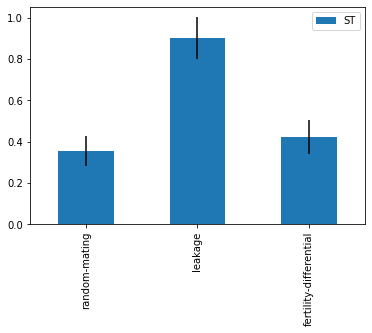

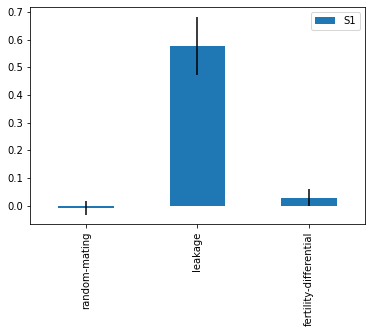

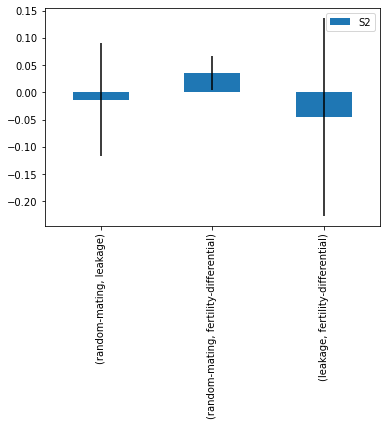

In [5]:
sb = Sensitivity(problem, df['g4'], X)
sb.score('sobol')
sb.plot(save=True, filepath= plots_path + 'vt-sobol-prop-obese.pdf',
    move=True, moving_path= '../manuscript/plots/')
sb.plot3D(labels={'outcome':'obese', 'y':'random mating', 'x':'fertility', 'z':'leakage'})
sav = {
    'sb_obese_s1': sb.tabval('S1'),
    'sb_obese_s2': sb.tabval('S2'),
    'sb_obese_st': sb.tabval('ST')
}

## Average BMI

                              ST   ST_conf
random-mating           0.256114  0.037054
leakage                 0.843084  0.058777
fertility-differential  0.384133  0.052336
                              S1   S1_conf
random-mating          -0.005806  0.026882
leakage                 0.565750  0.069282
fertility-differential  0.084477  0.037316
                                               S2   S2_conf
(random-mating, leakage)                 0.026401  0.068296
(random-mating, fertility-differential)  0.037899  0.036515
(leakage, fertility-differential)        0.024086  0.116634


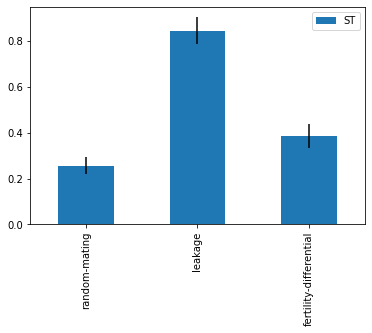

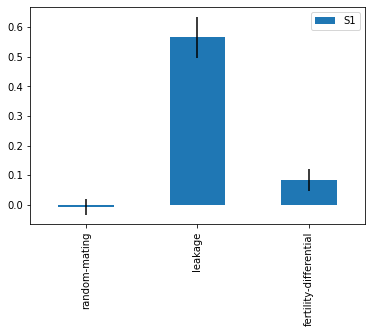

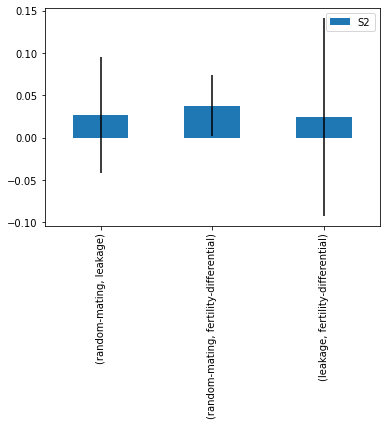

In [6]:
sb = Sensitivity(problem, df['average_bmi'], X)
sb.score('sobol')
sb.plot(save=True, filepath= plots_path + 'vt-sobol-average-bmi.pdf',
    move=True, moving_path= '../manuscript/plots/')
sb.plot3D(labels={'outcome':'avearge bmi', 'y':'random mating', 'x':'vertical transmission', 'z':'leakage'})

sav['sb_average_s1'] =  sb.tabval('S1')
sav['sb_average_s2'] =  sb.tabval('S2')
sav['sb_average_st'] =  sb.tabval('ST')

## SD BMI

                              ST   ST_conf
random-mating           0.305651  0.047987
leakage                 0.808247  0.087762
fertility-differential  0.554766  0.097992
                              S1   S1_conf
random-mating          -0.032536  0.031194
leakage                 0.328546  0.085997
fertility-differential  0.075265  0.053132
                                               S2   S2_conf
(random-mating, leakage)                 0.070256  0.078135
(random-mating, fertility-differential)  0.049671  0.041778
(leakage, fertility-differential)        0.083693  0.129035


['sobol-vt.pkl']

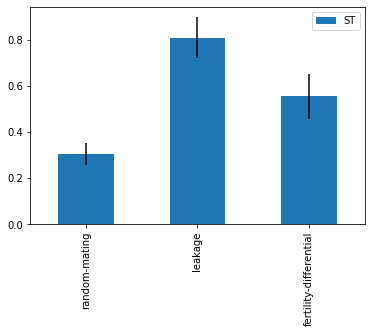

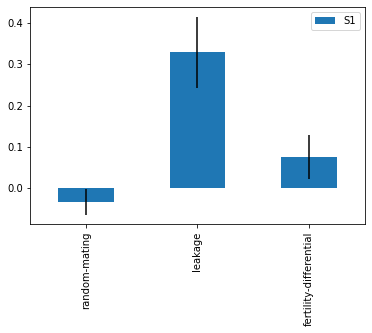

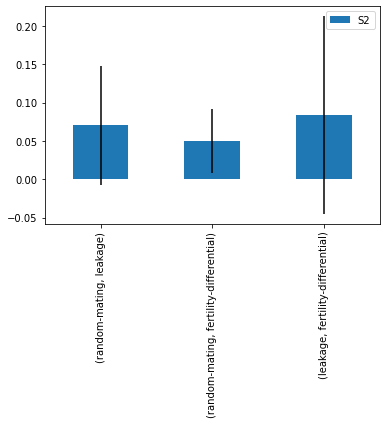

In [7]:
sb = Sensitivity(problem, df['sd_bmi'], X)
sb.score('sobol')
sb.plot(save=True, filepath= plots_path + 'vt-sobol-sd-bmi.pdf',
    move=True, moving_path= '../manuscript/plots/')
sb.plot3D(labels={'outcome':'avearge bmi', 'y':'random mating', 'x':'vertical transmission', 'z':'leakage'})

sav['sb_sd_s1'] =  sb.tabval('S1')
sav['sb_sd_s2'] =  sb.tabval('S2')
sav['sb_sd_st'] =  sb.tabval('ST')

# save output
v = sb.createRows(sav, g=['s1', 's2', 'st'])
joblib.dump(v, 'sobol-vt.pkl')